In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

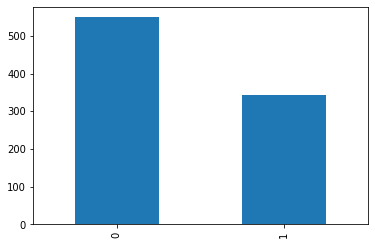

In [6]:
data['Survived'].value_counts().plot(kind='bar')

In [7]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [8]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
cols = train_x.columns

In [11]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [14]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [16]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7554671968190854


In [17]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.7500000000000001


In [18]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.51588994, 0.48411006],
       [0.9061611 , 0.0938389 ],
       [0.87148895, 0.12851105],
       ...,
       [0.22892071, 0.77107929],
       [0.31938475, 0.68061525],
       [0.0450814 , 0.9549186 ]])

In [19]:
train_preds = train_predict[:,1]
train_preds

array([0.48411006, 0.0938389 , 0.12851105, 0.78497297, 0.6355183 ,
       0.11586216, 0.84315633, 0.77126711, 0.53804719, 0.08437062,
       0.1058325 , 0.08614071, 0.12298241, 0.09656517, 0.60836609,
       0.08518602, 0.31381307, 0.11932379, 0.0728184 , 0.28367102,
       0.10375727, 0.21801306, 0.07489365, 0.58556452, 0.09079613,
       0.51462476, 0.08598623, 0.55486204, 0.60616007, 0.12699391,
       0.81954107, 0.08617763, 0.59304692, 0.13751797, 0.02376095,
       0.58146584, 0.2170683 , 0.12577254, 0.0601951 , 0.28029493,
       0.84453967, 0.39363636, 0.21168087, 0.70162768, 0.48284238,
       0.94169493, 0.36467866, 0.23257725, 0.16533752, 0.89546046,
       0.13100128, 0.63680303, 0.2357346 , 0.61273164, 0.34345662,
       0.64332321, 0.77588772, 0.2872013 , 0.10886415, 0.31083252,
       0.58174161, 0.2872013 , 0.12465255, 0.45786824, 0.10612971,
       0.97596317, 0.11628988, 0.08614071, 0.86032821, 0.66195296,
       0.9321215 , 0.7409277 , 0.89399676, 0.44889997, 0.83610

In [20]:
for i in range(0, len(train_preds)):
    if(train_preds[i]>0.55):
        train_preds[i] = 1
    else:
        train_preds[i] = 0
  

In [21]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )


Training f1_score 0.7381443298969073


In [22]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[128  16]
 [ 22  57]]


In [23]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.78      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



In [24]:
# printing the coefficients
logreg.coef_

array([[-0.03398343,  0.00304106,  1.01509554,  0.13675569, -1.07274193,
         1.18676102, -1.10765171,  0.82510034,  1.01804399,  0.32746763,
        -0.65023871, -0.75657255, -0.27426065, -0.41043074,  0.11409976,
         0.58535114, -0.19183298,  0.20030529, -0.33510241, -0.13453639,
        -0.1591751 ,  0.13422668,  0.23551204, -0.29062941]])

Text(0.5, 1.0, 'Coefficient plot')

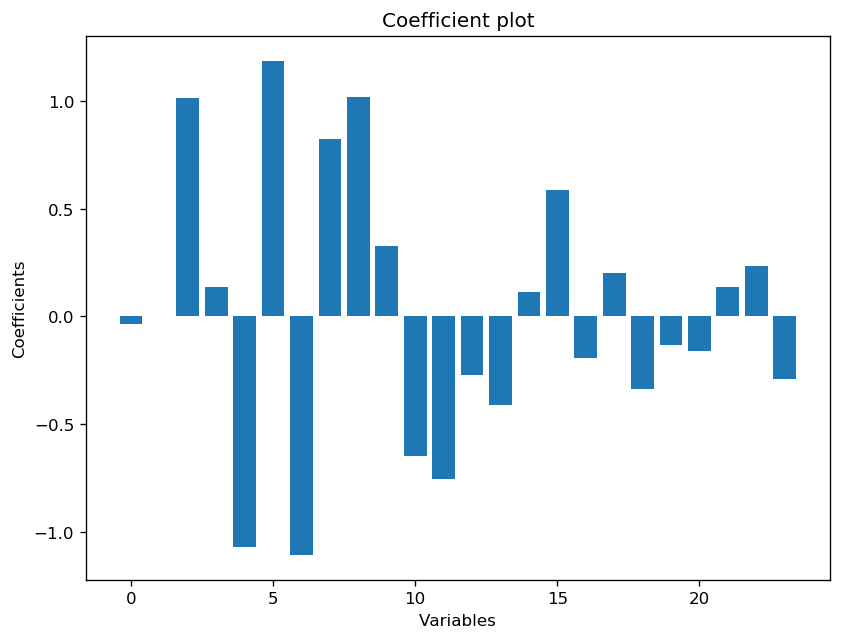

In [25]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [26]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.033983
1,Fare,0.003041
2,Pclass_1,1.015096
3,Pclass_2,0.136756
4,Pclass_3,1.072742


In [27]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [29]:
sig_var

,Variable,coefficient
2,Pclass_1,1.015096
4,Pclass_3,1.072742
5,Sex_female,1.186761
6,Sex_male,1.107652
7,SibSp_0,0.825100
8,SibSp_1,1.018044
9,SibSp_2,0.327468
10,SibSp_3,0.650239
11,SibSp_4,0.756573
13,SibSp_8,0.410431


In [28]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


# Example with Cancer Data-set and and Probability Threshold

In [32]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [33]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(cancer.data, cancer.target, test_size=0.3, stratify=cancer.target, random_state=30)

In [36]:
cancerclf = LogReg()
cancerclf.fit(X_trainc, y_trainc)

C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
probac = cancerclf.predict_proba(X_testc)
print(probac[1:10] )

[[5.58587084e-02 9.44141292e-01]
 [8.05247529e-03 9.91947525e-01]
 [9.99947378e-01 5.26224754e-05]
 [5.10379527e-02 9.48962047e-01]
 [9.70099061e-01 2.99009392e-02]
 [3.46960477e-01 6.53039523e-01]
 [9.99697131e-01 3.02869015e-04]
 [8.71978835e-04 9.99128021e-01]
 [9.99997376e-01 2.62360322e-06]]


In [38]:
predict = cancerclf.predict(X_testc)
predict

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [39]:
probability = probac[:,0]
prob_df = pd.DataFrame(probability)
print(prob_df.head(10))

          0
0  0.005305
1  0.055859
2  0.008052
3  0.999947
4  0.051038
5  0.970099
6  0.346960
7  0.999697
8  0.000872
9  0.999997


In [40]:
prob_df['predict'] = np.where(prob_df[0]>=0.90, 1, 0)# create a new column

In [41]:
print(prob_df)

            0  predict
0    0.005305        0
1    0.055859        0
2    0.008052        0
3    0.999947        1
4    0.051038        0
..        ...      ...
166  0.903403        1
167  1.000000        1
168  0.004179        0
169  0.008878        0
170  0.052353        0

[171 rows x 2 columns]
